In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('house1.csv')

In [3]:
data.head(5)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
data['mean sales']=data['Sale Price'].mean()

In [5]:
data['mean sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean sales, dtype: float64

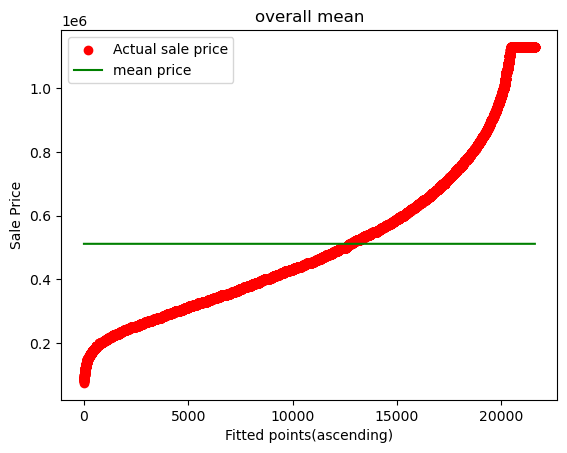

In [6]:
plt.figure(dpi=100)
k=range(0,len(data))
plt.scatter(k,data['Sale Price'].sort_values(),color='red',label='Actual sale price')
plt.plot(k,data['mean sales'].sort_values(),color='green',label='mean price')
plt.xlabel('Fitted points(ascending)')
plt.ylabel('Sale Price')
plt.title('overall mean')
plt.legend()

In [7]:
grades_mean=data.pivot_table(values="Sale Price",columns="Overall Grade",aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
#making new column
data['grade_mean'] = 0
#for every grade,fill its mean price in new column
for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
    
    
data['grade_mean'].head()    

C:\Users\Atul Lanjewar\AppData\Local\Temp\ipykernel_1656\3514244890.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [9]:
gradewise_list = []
for i in range(1,11):
    k = data["Sale Price"][data["Overall Grade"]==i]
    gradewise_list.append(k)

In [10]:
classwise_list =[]
for i in range(1,11):
    k=data['Sale Price'][data['Overall Grade']==i]
    classwise_list.append(k)

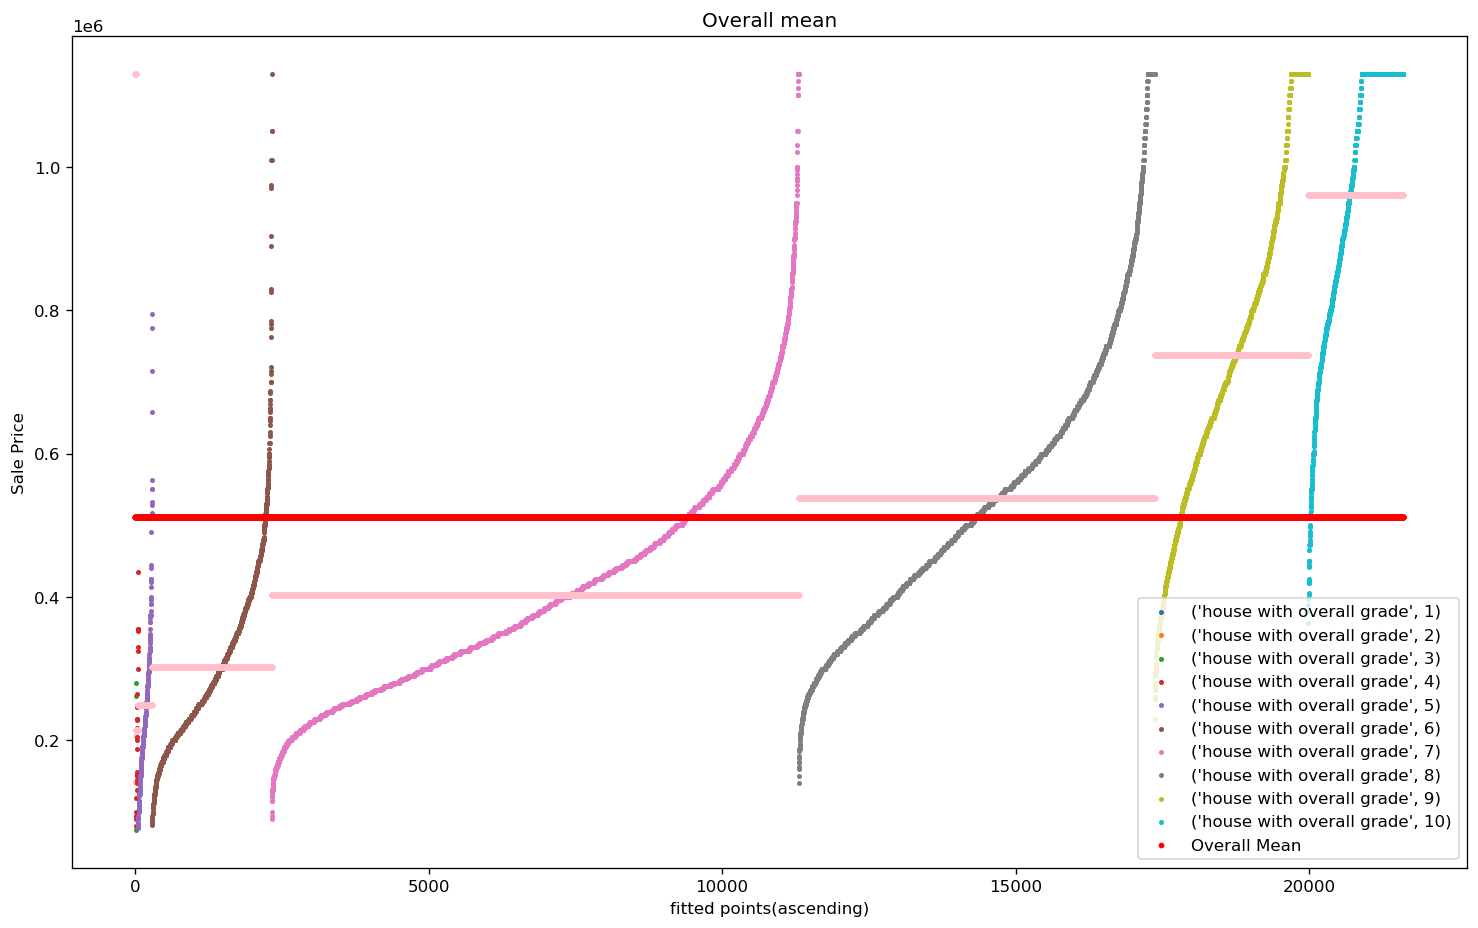

In [11]:
plt.figure( dpi=120, figsize = (15,9))
##plotting sale variable gradewise###
##z variable is for x-axis##
z=0
for i in range(1,11):
    #defining the x axis using z
    points=[k for k in range(z,z+len(classwise_list[i-1]))]
    #plotting
    plt.scatter(points,
                classwise_list[i-1].sort_values(),
               label=("house with overall grade",i),s=4)
    #plotting gradewise mean
    plt.scatter(points,
               [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
                s=6,color='pink'
               )
    z = max(points) + 1
    
    #plotting overall mean
plt.scatter([q for q in range(0,z)],
               data['mean sales'],
               color='red',
               label='Overall Mean',
               s=6)
    
plt.xlabel('fitted points(ascending)')
plt.ylabel('Sale Price')
plt.title('Overall mean')
plt.legend(loc=4)

In [12]:
mean_difference = data['mean sales']-data['Sale Price']
grade_mean_difference = data['grade_mean']-data['Sale Price']

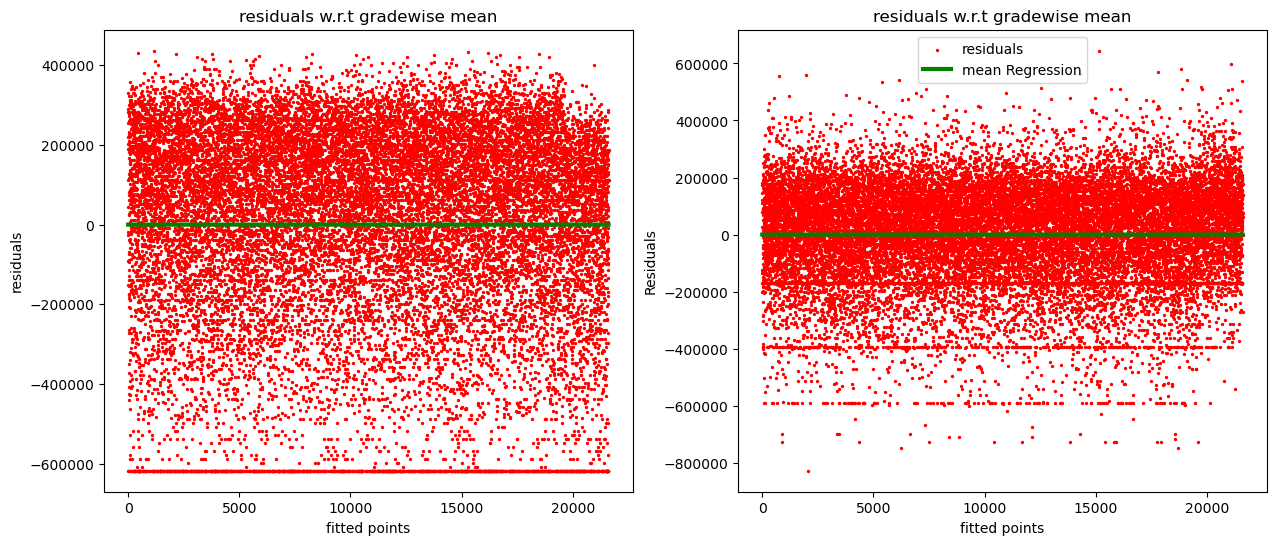

In [13]:
k = range(0,len(data))
l = [0 for i in range(len(data))]

plt.figure(figsize=(15,6),dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('fitted points')
plt.ylabel('residuals')
plt.title('residuals w.r.t gradewise mean')

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='residuals',s=2)
plt.plot(k,l,color='green',label='mean Regression',linewidth=3)
plt.xlabel('fitted points')
plt.ylabel('Residuals')
plt.legend()
plt.title('residuals w.r.t gradewise mean')

plt.legend()

In [14]:
cost= sum(mean_difference)/len(data)
print(round(cost,7))

0.0


In [15]:
#mean absolute error

In [16]:
Y = data['Sale Price']
Y_hat1 = data['mean sales']
Y_hat2 = data['grade_mean']
n = len(data)

In [17]:
len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [18]:
cost_mean=sum(abs(Y_hat1-Y))/n
cost_mean

199168.78146839526

In [19]:
cost_grade_mean=sum(abs(Y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [ ]:
#mean absolute error

In [20]:
from sklearn.metrics import mean_absolute_error
cost_grade_mean=mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

In [ ]:
#mean squared error

In [21]:
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)
cost_grade_mean = mean_squared_error(Y_hat2,Y)
cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [22]:
#root mean squared error
from sklearn.metrics import mean_squared_error
cost_mean=mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2,Y)**0.5
cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [23]:
Y=data['Sale Price']
Y_bar=data['mean sales']
Y_hat=data['grade_mean']
n=len(data)
len(Y),len(Y_bar),len(Y_hat),n

(21609, 21609, 21609, 21609)

In [24]:
mse_mean=mean_squared_error(Y_bar,Y)

In [25]:
mse_mean

62528116847.799576

In [26]:
mse_model=mean_squared_error(Y_hat,Y)
mse_model

30804835720.342426

In [27]:
R2=1-(mse_model)/(mse_mean)

In [28]:
R2

0.5073442592981836